In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pysam
from collections import Counter
from matplotlib import cm
from matplotlib.colors import ListedColormap

import io
from pysam import VariantFile

from sklearn.metrics import precision_score, recall_score

In [2]:
tab20 = cm.get_cmap('tab10', 8)
newcmap_list = []
for i in range(4):
    newcmap_list.append(tab20.colors[i])
for i in range(4):
    newcmap_list.append(np.array(list(tab20.colors[i][:-1]) +[0.3]))

newcmap = ListedColormap(newcmap_list, name='newcmap')

In [3]:
def read_vcf(path):
    with open(path, 'r') as f:
        lines = [l for l in f if not l.startswith('##')]
    res = pd.read_csv(
        io.StringIO(''.join(lines)),
        dtype={'#CHROM': str, 'POS': int, 'ID': str, 'REF': str, 'ALT': str,
               'QUAL': str, 'FILTER': str, 'INFO': str},
        sep='\t'
    ).rename(columns={'#CHROM': 'CHROM'})
    return res

# Dilution effect on 809_110914

In [12]:
foo = lambda x: pd.Series(x.split('CALLERS=')[1].split(';')[0])
vcf_pd_0 = read_vcf("../data/2015-07-31_CRC-809_110914-filter-1-0/CRC-809_110914-filter-1-0-ensemble-annotated.vcf")
vcf_pd_1 = read_vcf("../data/2015-07-31_CRC-809_110914-filter-05-05/CRC-809_110914-filter-05-05-ensemble-annotated.vcf")
vcf_pd_2 = read_vcf("../data/2015-07-31_CRC-809_110914-filter-005-095/CRC-809_110914-filter-005-095-ensemble-annotated.vcf")
vcf_pd_3 = read_vcf("../data/2015-07-31_CRC-809_110914-filter-001-099/CRC-809_110914-filter-001-099-ensemble-annotated.vcf")

vcf_pd_0['INFO'] = vcf_pd_0['INFO'].apply(foo)
vcf_pd_0['freebayes'] = vcf_pd_0['INFO'].str.contains('freebayes')
vcf_pd_0['vardict'] = vcf_pd_0['INFO'].str.contains('vardict')
vcf_pd_0['varscan'] = vcf_pd_0['INFO'].str.contains('varscan')
vcf_pd_0['mutect2'] = vcf_pd_0['INFO'].str.contains('mutect2')
vcf_pd_0['strelka2'] = vcf_pd_0['INFO'].str.contains('strelka2')
vcf_pd_0.drop('INFO', axis=1)

vcf_pd_1['INFO'] = vcf_pd_1['INFO'].apply(foo)
vcf_pd_1['freebayes'] = vcf_pd_1['INFO'].str.contains('freebayes')
vcf_pd_1['vardict'] = vcf_pd_1['INFO'].str.contains('vardict')
vcf_pd_1['varscan'] = vcf_pd_1['INFO'].str.contains('varscan')
vcf_pd_1['mutect2'] = vcf_pd_1['INFO'].str.contains('mutect2')
vcf_pd_1['strelka2'] = vcf_pd_1['INFO'].str.contains('strelka2')
vcf_pd_1.drop('INFO', axis=1)

vcf_pd_2['INFO'] = vcf_pd_2['INFO'].apply(foo)
vcf_pd_2['freebayes'] = vcf_pd_2['INFO'].str.contains('freebayes')
vcf_pd_2['vardict'] = vcf_pd_2['INFO'].str.contains('vardict')
vcf_pd_2['varscan'] = vcf_pd_2['INFO'].str.contains('varscan')
vcf_pd_2['mutect2'] = vcf_pd_2['INFO'].str.contains('mutect2')
vcf_pd_2['strelka2'] = vcf_pd_2['INFO'].str.contains('strelka2')
vcf_pd_2.drop('INFO', axis=1)

vcf_pd_3['INFO'] = vcf_pd_3['INFO'].apply(foo)
vcf_pd_3['freebayes'] = vcf_pd_3['INFO'].str.contains('freebayes')
vcf_pd_3['vardict'] = vcf_pd_3['INFO'].str.contains('vardict')
vcf_pd_3['varscan'] = vcf_pd_3['INFO'].str.contains('varscan')
vcf_pd_3['mutect2'] = vcf_pd_3['INFO'].str.contains('mutect2')
vcf_pd_3['strelka2'] = vcf_pd_3['INFO'].str.contains('strelka2')
vcf_pd_3.drop('INFO', axis=1)

vcf_pd_0['SNV callers'] = vcf_pd_0['freebayes'].map(str) + '_' + vcf_pd_0['vardict'].map(str) +  '_' + vcf_pd_0['varscan'].map(str)
vcf_pd_1['SNV callers'] = vcf_pd_1['freebayes'].map(str) + '_' + vcf_pd_1['vardict'].map(str) +  '_' + vcf_pd_1['varscan'].map(str)
vcf_pd_2['SNV callers'] = vcf_pd_2['freebayes'].map(str) + '_' + vcf_pd_2['vardict'].map(str) +  '_' + vcf_pd_2['varscan'].map(str)
vcf_pd_3['SNV callers'] = vcf_pd_3['freebayes'].map(str) + '_' + vcf_pd_3['vardict'].map(str) +  '_' + vcf_pd_3['varscan'].map(str)

sample_0 = vcf_pd_0[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_0['CHROM_POS'] = sample_0['CHROM'].astype('str').str.cat(sample_0['POS'].astype('str'),sep="_")
sample_0.set_index('CHROM_POS', inplace = True)

sample_1 = vcf_pd_1[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_1['CHROM_POS'] = sample_1['CHROM'].astype('str').str.cat(sample_1['POS'].astype('str'),sep="_")
sample_1.set_index('CHROM_POS', inplace = True)

sample_2 = vcf_pd_2[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_2['CHROM_POS'] = sample_2['CHROM'].astype('str').str.cat(sample_2['POS'].astype('str'),sep="_")
sample_2.set_index('CHROM_POS', inplace = True)

sample_3 = vcf_pd_3[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_3['CHROM_POS'] = sample_3['CHROM'].astype('str').str.cat(sample_3['POS'].astype('str'),sep="_")
sample_3.set_index('CHROM_POS', inplace = True)

sample_3.head()

/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,CHROM,POS,REF,ALT,QUAL,freebayes,vardict,varscan,mutect2,strelka2,SNV callers
CHROM_POS,,,,,,,,,,,
22_16061188,22,16061188,C,T,0.0,False,True,False,True,False,False_True_False
22_16152342,22,16152342,C,T,89.0,False,True,True,False,False,False_True_True
22_16161139,22,16161139,G,A,80.0,False,True,True,False,False,False_True_True
22_16161163,22,16161163,G,A,20.1,True,True,True,False,False,True_True_True
22_16170764,22,16170764,C,A,0.0,False,False,True,True,False,False_False_True


## Estimated tumor burden of mixed samples

In [5]:
samples_tf = {
    'sample_0': 0.47,
    'sample_1': float(list(pd.read_csv("../data/2015-07-31_CRC-809_110914-filter-05-05/estimated_tf.txt").columns)[0]),
    'sample_2': float(list(pd.read_csv("../data/2015-07-31_CRC-809_110914-filter-005-095/estimated_tf.txt").columns)[0]),
    'sample_3': float(list(pd.read_csv("../data/2015-07-31_CRC-809_110914-filter-001-099/estimated_tf.txt").columns)[0]),
}

print(samples_tf)

{'sample_0': 0.47, 'sample_1': 0.13079795121568735, 'sample_2': 0.009356015783430916, 'sample_3': 0.0018250191189925337}


## Single method comparison w.r.t dilution

In [ ]:
s0 = sample_0[['REF', 'ALT', 'QUAL', 'freebayes']]
s0.rename(columns = {'freebayes':'sample_0'},  inplace = True)
s1 = sample_1[['REF', 'ALT', 'QUAL', 'freebayes']]
s1.rename(columns = {'freebayes':'sample_1'},  inplace = True)
s2 = sample_2[['REF', 'ALT', 'QUAL', 'freebayes']]
s2.rename(columns = {'freebayes':'sample_2'},  inplace = True)
s3 = sample_3[['REF', 'ALT', 'QUAL', 'freebayes']]
s3.rename(columns = {'freebayes':'sample_3'},  inplace = True)

print(s0.shape[0] + s1.shape[0] + s2.shape[0] + s3.shape[0])
pd_freebayes = pd.concat([s0, s1, s2, s3], axis=1)
print(pd_freebayes.shape[0])

pd_freebayes[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_freebayes[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
pd_freebayes.drop(pd_freebayes[pd_freebayes['sample_0'] + pd_freebayes['sample_1'] + pd_freebayes['sample_2'] + pd_freebayes['sample_3'] == False].index, axis=0, inplace=True)

### check for disagrement about the mutation type ###
for index, row in pd_freebayes[['REF']].iterrows():
    if len(np.unique((row.dropna().values))) > 1:
        print(index)
        print(row)
        
# here 1 locus with disagreement 22_24072091 GT -> G (sample 1) or G -> GT (sample 2 and sample 3)
# but sample_1 has False detection
# print(pd_freebayes.loc[['22_24072091']])

for index, row in pd_freebayes[['ALT']].iterrows():
    if len(np.unique((row.dropna().values))) > 1:
        print(index)
        print(row)
        
pd_freebayes['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_freebayes['REF'].values)]
pd_freebayes['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_freebayes['ALT'].values)]
pd_freebayes = pd_freebayes.T.drop_duplicates().T
pd_freebayes.columns = ['REF', 'ALT', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
pd_freebayes.head()

In [ ]:
pd_freebayes.groupby(['sample_0', 'sample_1', 'sample_2', 'sample_3']).size()
for qual in ['QUAL_0', 'QUAL_1', 'QUAL_2', 'QUAL_3']:
    print('#############')
    print(qual)
    print(pd_freebayes[(pd_freebayes[qual].astype(float) > 10)].groupby(['sample_0', 'sample_1', 'sample_2', 'sample_3']).size())
    
print(pd_freebayes[(pd_freebayes['QUAL_0'].astype(float) < 10) & (pd_freebayes['sample_0'] == True)].shape[0])

In [ ]:
# quality
aux  = pd_freebayes['sample_0'].map(str) + '_' + pd_freebayes['sample_1'].map(str) + '_' + pd_freebayes['sample_2'].map(str) +  '_' + pd_freebayes['sample_3'].map(str)
pd_freebayes_quality = pd_freebayes.copy()
pd_freebayes_quality.reset_index(inplace=True)
pd_freebayes_quality = pd.melt(pd_freebayes_quality, id_vars =['index'], value_vars =['QUAL_0', 'QUAL_1', 'QUAL_2', 'QUAL_3'])
pd_freebayes_quality.set_index('index', inplace=True)
pd_freebayes_quality['value'] = pd_freebayes_quality['value'].astype(float)
pd_freebayes_quality['SNV calling'] = aux
plt.figure(figsize=(35, 6))
sns.boxplot(y="value", x="SNV calling", hue='variable', data=pd_freebayes_quality[pd_freebayes_quality['value'] < 200], )

In [ ]:
aux = pd_freebayes['sample_2'].map(str) +  '_' + pd_freebayes['sample_3'].map(str)
df_plot = pd_freebayes.copy()
df_plot = df_plot.rename({'sample_1': 'SNVs detected in s1'}, axis=1)
df_plot['SNV calling'] = aux
df_plot = df_plot.groupby(['SNVs detected in s1', 'SNV calling']).size().reset_index().pivot(columns='SNV calling', index='SNVs detected in s1', values=0)
df_plot['detected only in s2 or in s3'] = df_plot['False_True'] + df_plot['True_False']
df_plot = df_plot.rename({'False_False': 'detected in s1 only', 'True_True': 'detected in both s2 and s3',}, axis=1)
df_plot = df_plot[['detected in s1 only', 'detected only in s2 or in s3', 'detected in both s2 and s3']]
df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
df_plot

aux = pd_freebayes['sample_2'].map(str) +  '_' + pd_freebayes['sample_3'].map(str)
df_plot = pd_freebayes.copy()
df_plot = df_plot.rename({'sample_1': 'SNVs detected in s1'}, axis=1)
df_plot['SNV calling'] = aux
df_plot = df_plot.groupby(['SNVs detected in s1', 'SNV calling']).size().reset_index().pivot(columns='SNV calling', index='SNVs detected in s1', values=0)
df_plot = df_plot.rename({'False_False': 'detected in s1 only', 'True_True': 'detected in both s2 and s3',
                         'False_True': 'detected in s3 only', 'True_False': 'detected in s2 only'}, axis=1)
df_plot.plot(kind='bar', stacked=True, figsize=(10, 6))
df_plot

In [ ]:
pd_freebayes[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_freebayes[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
pd_freebayes.drop(pd_freebayes[pd_freebayes['sample_0'] + pd_freebayes['sample_1'] + pd_freebayes['sample_2'] + pd_freebayes['sample_3'] == False].index, axis=0, inplace=True)
#pd_freebayes = pd_freebayes[pd_freebayes['QUAL'].astype(float) > 10]
pd_freebayes[['REF', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()

res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

y_true = pd_freebayes['sample_0'].astype(bool).values

res_df['precision'] = [1,
                  precision_score(y_true, pd_freebayes['sample_1'].astype(bool).values),
                  precision_score(y_true, pd_freebayes['sample_2'].astype(bool).values),
                  precision_score(y_true, pd_freebayes['sample_3'].astype(bool).values),
                 ]

res_df['recall'] = [1,
                  recall_score(y_true, pd_freebayes['sample_1'].astype(bool).values),
                  recall_score(y_true, pd_freebayes['sample_2'].astype(bool).values),
                  recall_score(y_true, pd_freebayes['sample_3'].astype(bool).values),
                 ]
print(res_df)
res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                var_name='metric', value_name='value')

g = sns.catplot(x="tumor burden", y="value", col="metric", #hue="kind",  
                capsize=.2, palette="YlGnBu_d", height=6, aspect=.75,
                kind="point", sort= False, data=res_df)

## Multiple method comparison

,freebayes,mutect2,strelka2,vardict,varscan
sample_0,105,73,115,149,174
sample_1,334,367,403,463,435
sample_2,429,717,696,678,673
sample_3,410,783,774,704,732


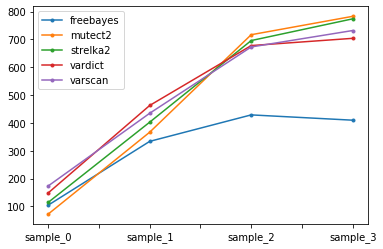

In [13]:
numbersnvs_pd = pd.DataFrame.empty

for si, s in enumerate([sample_0, sample_1, sample_2, sample_3]):
    nb_snv = []
    for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
        if si == 4:
            si = 't'
       # print('sample '+ str(si) + ': ', method, s[s[method] == True].shape[0])
        nb_snv.append(s[s[method] == True].shape[0])
    if si == 0:
        numbersnvs_pd = pd.DataFrame.from_dict({'sample_'+ str(si): nb_snv}).T
        numbersnvs_pd.columns = ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']
    else:
        numbersnvs_pd.loc['sample_'+ str(si)] = nb_snv

numbersnvs_pd.plot(style='.-')
        
numbersnvs_pd

In [ ]:


pd_methods = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)

    s0 = sample_0[['REF', 'ALT', 'QUAL', method]]
    s0.rename(columns = {method:'sample_0'},  inplace = True)
    s1 = sample_1[['REF', 'ALT', 'QUAL', method]]
    s1.rename(columns = {method:'sample_1'},  inplace = True)
    s2 = sample_2[['REF', 'ALT', 'QUAL', method]]
    s2.rename(columns = {method:'sample_2'},  inplace = True)
    s3 = sample_3[['REF', 'ALT', 'QUAL', method]]
    s3.rename(columns = {method:'sample_3'},  inplace = True)

    pd_method = pd.concat([s0, s1, s2, s3], axis=1)

    pd_method['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['REF'].values)]
    pd_method['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['ALT'].values)]
    pd_method = pd_method.T.drop_duplicates().T
    pd_method.columns = ['REF', 'ALT', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
    pd_method.head()

    pd_method[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_method[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
    pd_method.drop(pd_method[pd_method['sample_0'] + pd_method['sample_1'] + pd_method['sample_2'] + pd_method['sample_3'] == False].index, axis=0, inplace=True)
    pd_method[['REF', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()
    pd_method['caller'] = method

    if count == 0:
        pd_methods = pd_method
        count = 1
    else:
        pd_methods = pd.concat([pd_methods, pd_method], join='inner')
print(pd_methods.shape)

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

    y_true = pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values

    res_df['precision'] = [1,
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)
    

In [ ]:
y_true = pd_methods[['sample_0', 'caller']]
y_true.index.name = 'CHROM_POS'
y_true = y_true.groupby(['CHROM_POS'])['sample_0'].sum()
y_true[y_true == 1] = 0
y_true = y_true.astype(bool)
print(y_true.shape[0])

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')
    
    y_1 = pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).reindex(y_true.index).squeeze()
    y_1 = y_1.fillna(False)
    y_2 = pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).reindex(y_true.index).squeeze()
    y_2 = y_2.fillna(False)
    y_3 = pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).reindex(y_true.index).squeeze()
    y_3 = y_3.fillna(False)

    res_df['precision'] = [1,
                      precision_score(y_true.values, y_1.values),
                      precision_score(y_true.values, y_2.values),
                      precision_score(y_true.values, y_3.values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true.values, y_1.values),
                      recall_score(y_true.values, y_2.values),
                      recall_score(y_true.values, y_3.values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)


## 2 liquid biopsy samples as reference

In [ ]:
vcf_pd_0_bis = read_vcf("../data/2015-07-31_CRC-809_030915-filter-1-0/CRC-809_030915-filter-1-0-ensemble-annotated.vcf")

vcf_pd_0_bis['INFO'] = vcf_pd_0_bis['INFO'].apply(foo)
vcf_pd_0_bis['freebayes'] = vcf_pd_0_bis['INFO'].str.contains('freebayes')
vcf_pd_0_bis['vardict'] = vcf_pd_0_bis['INFO'].str.contains('vardict')
vcf_pd_0_bis['varscan'] = vcf_pd_0_bis['INFO'].str.contains('varscan')
vcf_pd_0_bis['mutect2'] = vcf_pd_0_bis['INFO'].str.contains('mutect2')
vcf_pd_0_bis['strelka2'] = vcf_pd_0_bis['INFO'].str.contains('strelka2')
vcf_pd_0_bis.drop('INFO', axis=1)

vcf_pd_0_bis['SNV callers'] = vcf_pd_0_bis['freebayes'].map(str) + '_' + vcf_pd_0_bis['vardict'].map(str) +  '_' + vcf_pd_0_bis['varscan'].map(str)

sample_0_bis = vcf_pd_0_bis[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_0_bis['CHROM_POS'] = sample_0_bis['CHROM'].astype('str').str.cat(sample_0_bis['POS'].astype('str'),sep="_")
sample_0_bis.set_index('CHROM_POS', inplace = True)
sample_0_bis.head()

In [ ]:
sample0 = sample_0.copy()
sample0['date'] = '110914'
sample0bis = sample_0_bis.copy()
sample0bis['date'] = '030915'
sample_ref = pd.concat([sample0, sample0bis], join='inner')
l1 = list(sample_ref[sample_ref['date'] == '110914'].index)
l2 = list(sample_ref[sample_ref['date'] == '030915'].index)
print(len(l1), len(l2))
print(len(list(set(set(l1) ^ set(l2)))))
print(len(list(set(set(l1) & set(l2)))))

In [ ]:
sample_ref.loc[list(set(set(l1) & set(l2)))]

In [ ]:
pd_methods = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)

    s0 = sample_0[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s0.rename(columns = {method:'sample_0'},  inplace = True)
    s1 = sample_1[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s1.rename(columns = {method:'sample_1'},  inplace = True)
    s2 = sample_2[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s2.rename(columns = {method:'sample_2'},  inplace = True)
    s3 = sample_3[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s3.rename(columns = {method:'sample_3'},  inplace = True)

    pd_method = pd.concat([s0, s1, s2, s3], axis=1)

    pd_method['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['REF'].values)]
    pd_method['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['ALT'].values)]
    pd_method = pd_method.T.drop_duplicates().T
    pd_method.columns = ['REF', 'ALT', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
    pd_method.head()

    pd_method[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_method[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
    pd_method.drop(pd_method[pd_method['sample_0'] + pd_method['sample_1'] + pd_method['sample_2'] + pd_method['sample_3'] == False].index, axis=0, inplace=True)
    pd_method[['REF', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()
    pd_method['caller'] = method

    if count == 0:
        pd_methods = pd_method
        count = 1
    else:
        pd_methods = pd.concat([pd_methods, pd_method], join='inner')
print(pd_methods.shape)

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

    y_true = pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values

    res_df['precision'] = [1,
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)

## Tumor reference

In [7]:
foo = lambda x: pd.Series(x.split('CALLERS=')[1].split(';')[0])
vcf_pd_t = read_vcf("../data/2015-07-31_NCC_CRC-809_290714-T1W/NCC_CRC-809_290714-T1W-ensemble-annotated.vcf")

vcf_pd_t['INFO'] = vcf_pd_t['INFO'].apply(foo)
vcf_pd_t['freebayes'] = vcf_pd_t['INFO'].str.contains('freebayes')
vcf_pd_t['vardict'] = vcf_pd_t['INFO'].str.contains('vardict')
vcf_pd_t['varscan'] = vcf_pd_t['INFO'].str.contains('varscan')
vcf_pd_t['mutect2'] = vcf_pd_t['INFO'].str.contains('mutect2')
vcf_pd_t['strelka2'] = vcf_pd_t['INFO'].str.contains('strelka2')
vcf_pd_t.drop('INFO', axis=1)


vcf_pd_t['SNV callers'] = vcf_pd_t['freebayes'].map(str) + '_' + vcf_pd_t['vardict'].map(str) +  '_' + vcf_pd_t['varscan'].map(str)

sample_t = vcf_pd_t[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_t['CHROM_POS'] = sample_t['CHROM'].astype('str').str.cat(sample_t['POS'].astype('str'),sep="_")
sample_t.set_index('CHROM_POS', inplace = True)
sample_t = sample_t[sample_t['CHROM'] == '22']
sample_t.head()

/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,CHROM,POS,REF,ALT,QUAL,freebayes,vardict,varscan,mutect2,strelka2,SNV callers
CHROM_POS,,,,,,,,,,,
22_16087547,22,16087547,C,G,5.85,True,False,True,False,False,True_False_True
22_16102873,22,16102873,A,G,64,False,True,True,False,False,False_True_True
22_16122748,22,16122748,C,T,.,False,True,True,True,False,False_True_True
22_16148732,22,16148732,G,A,582.86,True,True,False,False,False,True_True_False
22_16159672,22,16159672,A,G,.,True,True,False,True,False,True_True_False


In [ ]:
l1 = list(sample_t.index)
l2 = list(sample_0.index)
print(len(l1), len(l2))
print(len(list(set(set(l1) & set(l2)))))

In [ ]:
pd_method

In [ ]:
pd_methods = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    st = sample_t[['REF', 'ALT', 'QUAL', method]]
    st.rename(columns = {method:'sample_t'},  inplace = True)
    s0 = sample_0[['REF', 'ALT', 'QUAL', method]]
    s0.rename(columns = {method:'sample_0'},  inplace = True)
    s1 = sample_1[['REF', 'ALT', 'QUAL', method]]
    s1.rename(columns = {method:'sample_1'},  inplace = True)
    s2 = sample_2[['REF', 'ALT', 'QUAL', method]]
    s2.rename(columns = {method:'sample_2'},  inplace = True)
    s3 = sample_3[['REF', 'ALT', 'QUAL', method]]
    s3.rename(columns = {method:'sample_3'},  inplace = True)

    pd_method = pd.concat([st, s0, s1, s2, s3], axis=1)

    pd_method['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['REF'].values)]
    pd_method['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['ALT'].values)]
    pd_method = pd_method.T.drop_duplicates().T
    pd_method.columns = ['REF', 'ALT', 'QUAL_t', 'sample_t', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
    pd_method.head()

    pd_method[['sample_t', 'sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_method[['sample_t', 'sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
    pd_method.drop(pd_method[pd_method['sample_t'] + pd_method['sample_0'] + pd_method['sample_1'] + pd_method['sample_2'] + pd_method['sample_3'] == False].index, axis=0, inplace=True)
    pd_method[['REF', 'sample_t', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()
    pd_method['caller'] = method

    if count == 0:
        pd_methods = pd_method
        count = 1
    else:
        pd_methods = pd.concat([pd_methods, pd_method], join='inner')
print(pd_methods.shape)

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

    y_true = pd_methods[pd_methods['caller'] == method]['sample_t'].astype(bool).values

    res_df['precision'] = [
        precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values),
        precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
        precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
        precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]

    res_df['recall'] = [
        recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values),
        recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
        recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
        recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)
    

- Histograms of true allele frequencies in each tumor sample. Note how increasing admixture increases the prevalence of low- frequency variants.
- Benchmarking results for germline SNVs
- Benchmarking results for somatic SNVs on exome data.
- averaged over the four replicates

- add fake mutations on healthy mixtures

# Dilution effect on 986_100215

In [9]:
foo = lambda x: pd.Series(x.split('CALLERS=')[1].split(';')[0])
vcf_pd_0 = read_vcf("../data/2015-07-31_CRC-986_100215-filter-1-0/CRC-986_100215-filter-1-0-ensemble-annotated.vcf")
vcf_pd_1 = read_vcf("../data/2015-07-31_CRC-986_100215-filter-05-05/CRC-986_100215-filter-05-05-ensemble-annotated.vcf")
vcf_pd_2 = read_vcf("../data/2015-07-31_CRC-986_100215-filter-005-095/CRC-986_100215-filter-005-095-ensemble-annotated.vcf")
vcf_pd_3 = read_vcf("../data/2015-07-31_CRC-986_100215-filter-001-099/CRC-986_100215-filter-001-099-ensemble-annotated.vcf")

vcf_pd_0['INFO'] = vcf_pd_0['INFO'].apply(foo)
vcf_pd_0['freebayes'] = vcf_pd_0['INFO'].str.contains('freebayes')
vcf_pd_0['vardict'] = vcf_pd_0['INFO'].str.contains('vardict')
vcf_pd_0['varscan'] = vcf_pd_0['INFO'].str.contains('varscan')
vcf_pd_0['mutect2'] = vcf_pd_0['INFO'].str.contains('mutect2')
vcf_pd_0['strelka2'] = vcf_pd_0['INFO'].str.contains('strelka2')
vcf_pd_0.drop('INFO', axis=1)

vcf_pd_1['INFO'] = vcf_pd_1['INFO'].apply(foo)
vcf_pd_1['freebayes'] = vcf_pd_1['INFO'].str.contains('freebayes')
vcf_pd_1['vardict'] = vcf_pd_1['INFO'].str.contains('vardict')
vcf_pd_1['varscan'] = vcf_pd_1['INFO'].str.contains('varscan')
vcf_pd_1['mutect2'] = vcf_pd_1['INFO'].str.contains('mutect2')
vcf_pd_1['strelka2'] = vcf_pd_1['INFO'].str.contains('strelka2')
vcf_pd_1.drop('INFO', axis=1)

vcf_pd_2['INFO'] = vcf_pd_2['INFO'].apply(foo)
vcf_pd_2['freebayes'] = vcf_pd_2['INFO'].str.contains('freebayes')
vcf_pd_2['vardict'] = vcf_pd_2['INFO'].str.contains('vardict')
vcf_pd_2['varscan'] = vcf_pd_2['INFO'].str.contains('varscan')
vcf_pd_2['mutect2'] = vcf_pd_2['INFO'].str.contains('mutect2')
vcf_pd_2['strelka2'] = vcf_pd_2['INFO'].str.contains('strelka2')
vcf_pd_2.drop('INFO', axis=1)

vcf_pd_3['INFO'] = vcf_pd_3['INFO'].apply(foo)
vcf_pd_3['freebayes'] = vcf_pd_3['INFO'].str.contains('freebayes')
vcf_pd_3['vardict'] = vcf_pd_3['INFO'].str.contains('vardict')
vcf_pd_3['varscan'] = vcf_pd_3['INFO'].str.contains('varscan')
vcf_pd_3['mutect2'] = vcf_pd_3['INFO'].str.contains('mutect2')
vcf_pd_3['strelka2'] = vcf_pd_3['INFO'].str.contains('strelka2')
vcf_pd_3.drop('INFO', axis=1)

vcf_pd_0['SNV callers'] = vcf_pd_0['freebayes'].map(str) + '_' + vcf_pd_0['vardict'].map(str) +  '_' + vcf_pd_0['varscan'].map(str)
vcf_pd_1['SNV callers'] = vcf_pd_1['freebayes'].map(str) + '_' + vcf_pd_1['vardict'].map(str) +  '_' + vcf_pd_1['varscan'].map(str)
vcf_pd_2['SNV callers'] = vcf_pd_2['freebayes'].map(str) + '_' + vcf_pd_2['vardict'].map(str) +  '_' + vcf_pd_2['varscan'].map(str)
vcf_pd_3['SNV callers'] = vcf_pd_3['freebayes'].map(str) + '_' + vcf_pd_3['vardict'].map(str) +  '_' + vcf_pd_3['varscan'].map(str)

sample_0 = vcf_pd_0[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_0['CHROM_POS'] = sample_0['CHROM'].astype('str').str.cat(sample_0['POS'].astype('str'),sep="_")
sample_0.set_index('CHROM_POS', inplace = True)

sample_1 = vcf_pd_1[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_1['CHROM_POS'] = sample_1['CHROM'].astype('str').str.cat(sample_1['POS'].astype('str'),sep="_")
sample_1.set_index('CHROM_POS', inplace = True)

sample_2 = vcf_pd_2[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_2['CHROM_POS'] = sample_2['CHROM'].astype('str').str.cat(sample_2['POS'].astype('str'),sep="_")
sample_2.set_index('CHROM_POS', inplace = True)

sample_3 = vcf_pd_3[['CHROM', 'POS', 'REF', 'ALT', 'QUAL', 'freebayes', 'vardict', 'varscan', 'mutect2', 'strelka2', 'SNV callers']]
sample_3['CHROM_POS'] = sample_3['CHROM'].astype('str').str.cat(sample_3['POS'].astype('str'),sep="_")
sample_3.set_index('CHROM_POS', inplace = True)

sample_3.head()

/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/hanae/opt/anaconda3/envs/default/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,CHROM,POS,REF,ALT,QUAL,freebayes,vardict,varscan,mutect2,strelka2,SNV callers
CHROM_POS,,,,,,,,,,,
22_16061188,22,16061188,C,T,0.0,True,True,False,True,False,True_True_False
22_16117601,22,16117601,A,G,0.0,False,False,True,True,False,False_False_True
22_16161139,22,16161139,G,A,80.0,False,True,True,False,False,False_True_True
22_16161163,22,16161163,G,A,20.1,True,True,True,False,False,True_True_True
22_16228502,22,16228502,T,C,102.0,False,True,True,False,False,False_True_True


In [10]:
samples_tf = {
    'sample_0': 0.42,
    'sample_1': float(list(pd.read_csv("../data/2015-07-31_CRC-986_100215-filter-05-05/estimated_tf.txt").columns)[0]),
    'sample_2': float(list(pd.read_csv("../data/2015-07-31_CRC-986_100215-filter-005-095/estimated_tf.txt").columns)[0]),
    'sample_3': float(list(pd.read_csv("../data/2015-07-31_CRC-986_100215-filter-001-099/estimated_tf.txt").columns)[0]),
}

print(samples_tf)

{'sample_0': 0.42, 'sample_1': 0.1157732566392436, 'sample_2': 0.008253430816878448, 'sample_3': 0.0016095070864435633}


,freebayes,mutect2,strelka2,vardict,varscan
sample_0,58,60,76,123,136
sample_1,247,321,331,399,394
sample_2,399,708,645,655,652
sample_3,402,765,725,703,700


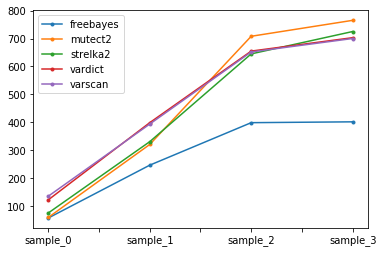

In [11]:
numbersnvs_pd = pd.DataFrame.empty

for si, s in enumerate([sample_0, sample_1, sample_2, sample_3]):
    nb_snv = []
    for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
        if si == 4:
            si = 't'
       # print('sample '+ str(si) + ': ', method, s[s[method] == True].shape[0])
        nb_snv.append(s[s[method] == True].shape[0])
    if si == 0:
        numbersnvs_pd = pd.DataFrame.from_dict({'sample_'+ str(si): nb_snv}).T
        numbersnvs_pd.columns = ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']
    else:
        numbersnvs_pd.loc['sample_'+ str(si)] = nb_snv

numbersnvs_pd.plot(style='.-')
        
numbersnvs_pd

In [ ]:
pd_methods = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)

    s0 = sample_0[['REF', 'ALT', 'QUAL', method]]
    s0.rename(columns = {method:'sample_0'},  inplace = True)
    s1 = sample_1[['REF', 'ALT', 'QUAL', method]]
    s1.rename(columns = {method:'sample_1'},  inplace = True)
    s2 = sample_2[['REF', 'ALT', 'QUAL', method]]
    s2.rename(columns = {method:'sample_2'},  inplace = True)
    s3 = sample_3[['REF', 'ALT', 'QUAL', method]]
    s3.rename(columns = {method:'sample_3'},  inplace = True)

    pd_method = pd.concat([s0, s1, s2, s3], axis=1)

    pd_method['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['REF'].values)]
    pd_method['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1] for ai in list(pd_method['ALT'].values)]
    pd_method = pd_method.T.drop_duplicates().T
    pd_method.columns = ['REF', 'ALT', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
    pd_method.head()

    pd_method[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_method[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
    pd_method.drop(pd_method[pd_method['sample_0'] + pd_method['sample_1'] + pd_method['sample_2'] + pd_method['sample_3'] == False].index, axis=0, inplace=True)
    pd_method[['REF', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()
    pd_method['caller'] = method

    if count == 0:
        pd_methods = pd_method
        count = 1
    else:
        pd_methods = pd.concat([pd_methods, pd_method], join='inner')
print(pd_methods.shape)

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

    y_true = pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values

    res_df['precision'] = [1,
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)
    

In [ ]:
y_true = pd_methods[['sample_0', 'caller']]
y_true.index.name = 'CHROM_POS'
y_true = y_true.groupby(['CHROM_POS'])['sample_0'].sum()
y_true[y_true == 1] = 0
y_true = y_true.astype(bool)
print(y_true.shape[0])

pd_results = pd.DataFrame.empty

count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')
    
    y_1 = pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).reindex(y_true.index).squeeze()
    y_1 = y_1.fillna(False)
    y_2 = pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).reindex(y_true.index).squeeze()
    y_2 = y_2.fillna(False)
    y_3 = pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).reindex(y_true.index).squeeze()
    y_3 = y_3.fillna(False)

    res_df['precision'] = [1,
                      precision_score(y_true.values, y_1.values),
                      precision_score(y_true.values, y_2.values),
                      precision_score(y_true.values, y_3.values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true.values, y_1.values),
                      recall_score(y_true.values, y_2.values),
                      recall_score(y_true.values, y_3.values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)


In [ ]:
pd_methods = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)

    s0 = sample_0[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s0.rename(columns = {method:'sample_0'},  inplace = True)
    s1 = sample_1[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s1.rename(columns = {method:'sample_1'},  inplace = True)
    s2 = sample_2[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s2.rename(columns = {method:'sample_2'},  inplace = True)
    s3 = sample_3[['REF', 'ALT', 'QUAL', method]].reindex(list(set(set(l1) & set(l2))))
    s3.rename(columns = {method:'sample_3'},  inplace = True)

    pd_method = pd.concat([s0, s1, s2, s3], axis=1)

    pd_method['REF'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1]
                        if len(list(np.unique([i for i in list(ai) if str(i) != 'nan']))) else 'nan'
                        for ai in list(pd_method['REF'].values)]
    pd_method['ALT'] = [list(np.unique([i for i in list(ai) if str(i) != 'nan']))[-1]
                        if len(list(np.unique([i for i in list(ai) if str(i) != 'nan']))) else 'nan'
                        for ai in list(pd_method['ALT'].values)]
    pd_method = pd_method.T.drop_duplicates().T
    pd_method.columns = ['REF', 'ALT', 'QUAL_0', 'sample_0', 'QUAL_1', 'sample_1', 'QUAL_2', 'sample_2',  'QUAL_3', 'sample_3']
    pd_method.head()

    pd_method[['sample_0', 'sample_1', 'sample_2', 'sample_3']] = pd_method[['sample_0','sample_1', 'sample_2', 'sample_3']].fillna(value=False)
    pd_method.drop(pd_method[pd_method['sample_0'] + pd_method['sample_1'] + pd_method['sample_2'] + pd_method['sample_3'] == False].index, axis=0, inplace=True)
    pd_method[['REF', 'sample_0', 'sample_1', 'sample_2', 'sample_3']].head()
    pd_method['caller'] = method

    if count == 0:
        pd_methods = pd_method
        count = 1
    else:
        pd_methods = pd.concat([pd_methods, pd_method], join='inner')
print(pd_methods.shape)

pd_results = pd.DataFrame.empty
count = 0

for method in ['freebayes', 'mutect2', 'strelka2', 'vardict', 'varscan']:
    print(method)
    
    res_df = (100*pd.Series(samples_tf)).round(decimals=2).to_frame(name='tumor burden')

    y_true = pd_methods[pd_methods['caller'] == method]['sample_0'].astype(bool).values

    res_df['precision'] = [1,
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      precision_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]

    res_df['recall'] = [1,
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_1'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_2'].astype(bool).values),
                      recall_score(y_true, pd_methods[pd_methods['caller'] == method]['sample_3'].astype(bool).values),
                     ]
    res_df = pd.melt(res_df, id_vars =['tumor burden'], value_vars =['precision', 'recall'],
                    var_name='metric', value_name='value')
    res_df['caller'] = method

    if count == 0:
        pd_results = res_df
        count = 1
    else:
        pd_results = pd.concat([pd_results, res_df], join='inner')

print(pd_results.head())
print(pd_results.shape)

g = sns.catplot(x="tumor burden", y="value", col="metric", hue="caller",  
                capsize=.2, height=6, aspect=.75,
                kind="point", order=sorted(pd_results['tumor burden'].unique(), reverse=True), data=pd_results)